In [281]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [282]:
#33.8688° S, 151.2093° E
# long, lat
sydney = [33.8688, 151.2093]
newcastle = [32.9283, 151.7817]
portmcquarie = [31.4333, 152.9000]
mallacoota = [37.5500, 149.7500]

long_arr = list()
lat_arr = list()
risk_arr = list()

In [283]:
for i in range(0, 300):
    long = random.uniform(portmcquarie[0], mallacoota[0])
    long_arr.append(long)
    
    lat = random.uniform( mallacoota[1], portmcquarie[1])
    lat_arr.append(lat)
    
    risk = random.randrange(1,4)
    risk_arr.append(risk)
#     if(long > 31 and long < 33):
#         risk_arr.append(1)
#     elif(long > 33 and long < 35):
#         risk_arr.append(2)
#     else:
#         risk_arr.append(3)

df = pd.DataFrame()

In [284]:
df['long'] = long_arr

In [285]:
df['lat'] = lat_arr

In [286]:
df['risk'] = risk_arr

In [287]:
df

,long,lat,risk
0,33.842666,150.094618,2
1,32.984292,152.494178,2
2,33.664379,152.076255,3
3,34.220528,149.855427,2
4,34.649945,149.938493,2
...,...,...,...
295,35.177436,151.558176,1
296,36.983771,152.482197,3
297,35.086693,150.634750,2
298,31.812265,151.391329,2


<function matplotlib.pyplot.legend(*args, **kwargs)>

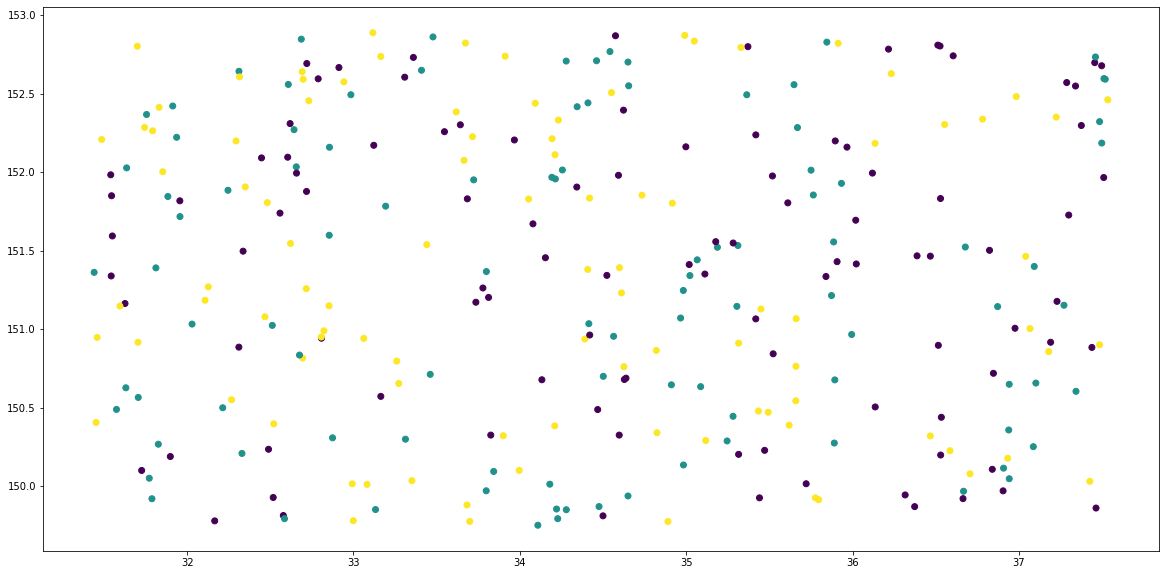

In [288]:
plt.figure(figsize=(20,10))
plt.scatter(long_arr, lat_arr, c= risk_arr)
plt.legend

In [289]:
from sklearn.model_selection import train_test_split

In [290]:
X = df.drop(columns=['risk'])
y = risk_arr

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [292]:
df.shape

(300, 3)

In [293]:
from sklearn.neighbors import KNeighborsClassifier

In [294]:
knn = KNeighborsClassifier(n_neighbors=3)

In [295]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [296]:
knn.predict(X_test)[0:5]

array([1, 1, 3, 1, 2])

In [297]:
knn.score(X_test, y_test)

0.32222222222222224

In [298]:
classes = {1:'low risk', 2:'mild risk',3:'high risk'}

long = input('what is longitude ')
lat = input('what is latitude ')

x_pred = pd.DataFrame()
x_pred['long'] = [long]
x_pred['lat'] = [lat]


y_pred = knn.predict(x_pred)


what is longitude 31
what is latitude 151


In [299]:
print(classes[y_pred[0]])

high risk


# Start over -- Will use different data set

In [306]:
df2 = pd.read_csv('fires-from-space-australia-and-new-zeland/fire_archive_M6_96619.csv')

In [312]:
df2.drop(columns=['scan', 'track', 'acq_date', 'acq_time', 'satellite', 'instrument', 'confidence', 'version', 'bright_t31', 'frp', 'daynight'])

,latitude,longitude,brightness,type
0,-11.8070,142.0583,313.0,0
1,-11.7924,142.0850,319.3,0
2,-12.8398,132.8744,311.6,0
3,-14.4306,143.3035,310.1,0
4,-12.4953,131.4897,310.3,0
...,...,...,...,...
36006,-28.0656,131.6334,312.7,0
36007,-28.2625,128.5494,304.9,0
36008,-28.2941,128.5123,301.7,0
36009,-28.3001,128.5530,303.6,0


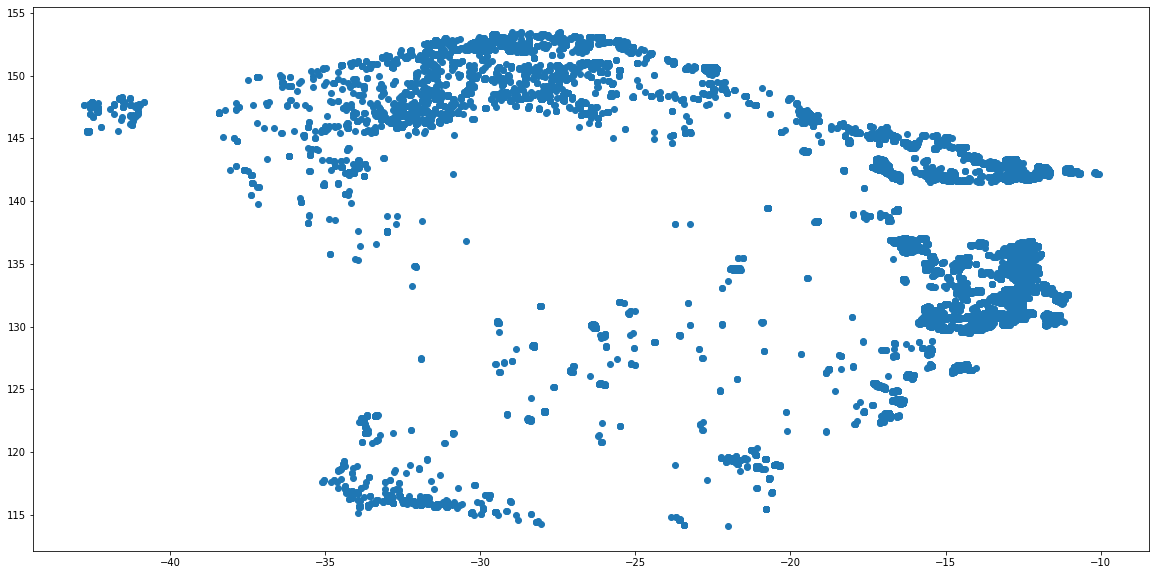

In [314]:
plt.figure(figsize=(20,10))
plt.scatter(df2['latitude'], df2['longitude'])

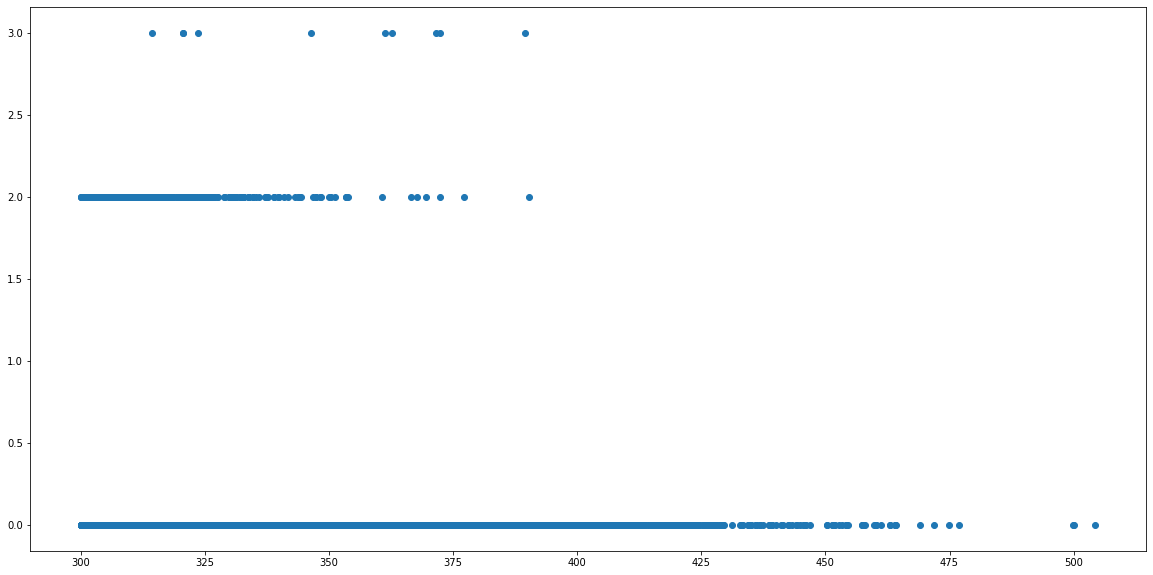

In [315]:
plt.figure(figsize=(20,10))
plt.scatter(df2['brightness'], df2['type'])

In [477]:
risk2 = list()
bright = df2['brightness']

In [478]:
risk2.append(1)
risk2

[1]

In [479]:
for i in range(0, 36010):
    if(bright[i] < 325.0):
        risk2.append(1)
    elif(bright[i] < 375 and bright[i] > 325):
        risk2.append(2)
    elif (bright[i] < 450 and bright[i] > 375):
        risk2.append(3)
    else:
        risk2.append(4)


In [480]:
len(bright)

36011

In [481]:
df2['risk'] = risk2

In [482]:
df2.head()

,latitude,longitude,brightness,type,risk
0,-11.8070,142.0583,313.0,0,1
1,-11.7924,142.0850,319.3,0,1
2,-12.8398,132.8744,311.6,0,1
3,-14.4306,143.3035,310.1,0,1
4,-12.4953,131.4897,310.3,0,1


In [484]:
X = df2.drop(columns=['risk', 'type'])
y = risk2

In [485]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [486]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [487]:
knn.predict(X_test)[0:5]

array([1, 1, 2, 2, 1])

In [488]:
knn.score(X_test, y_test)

0.6820769123976121

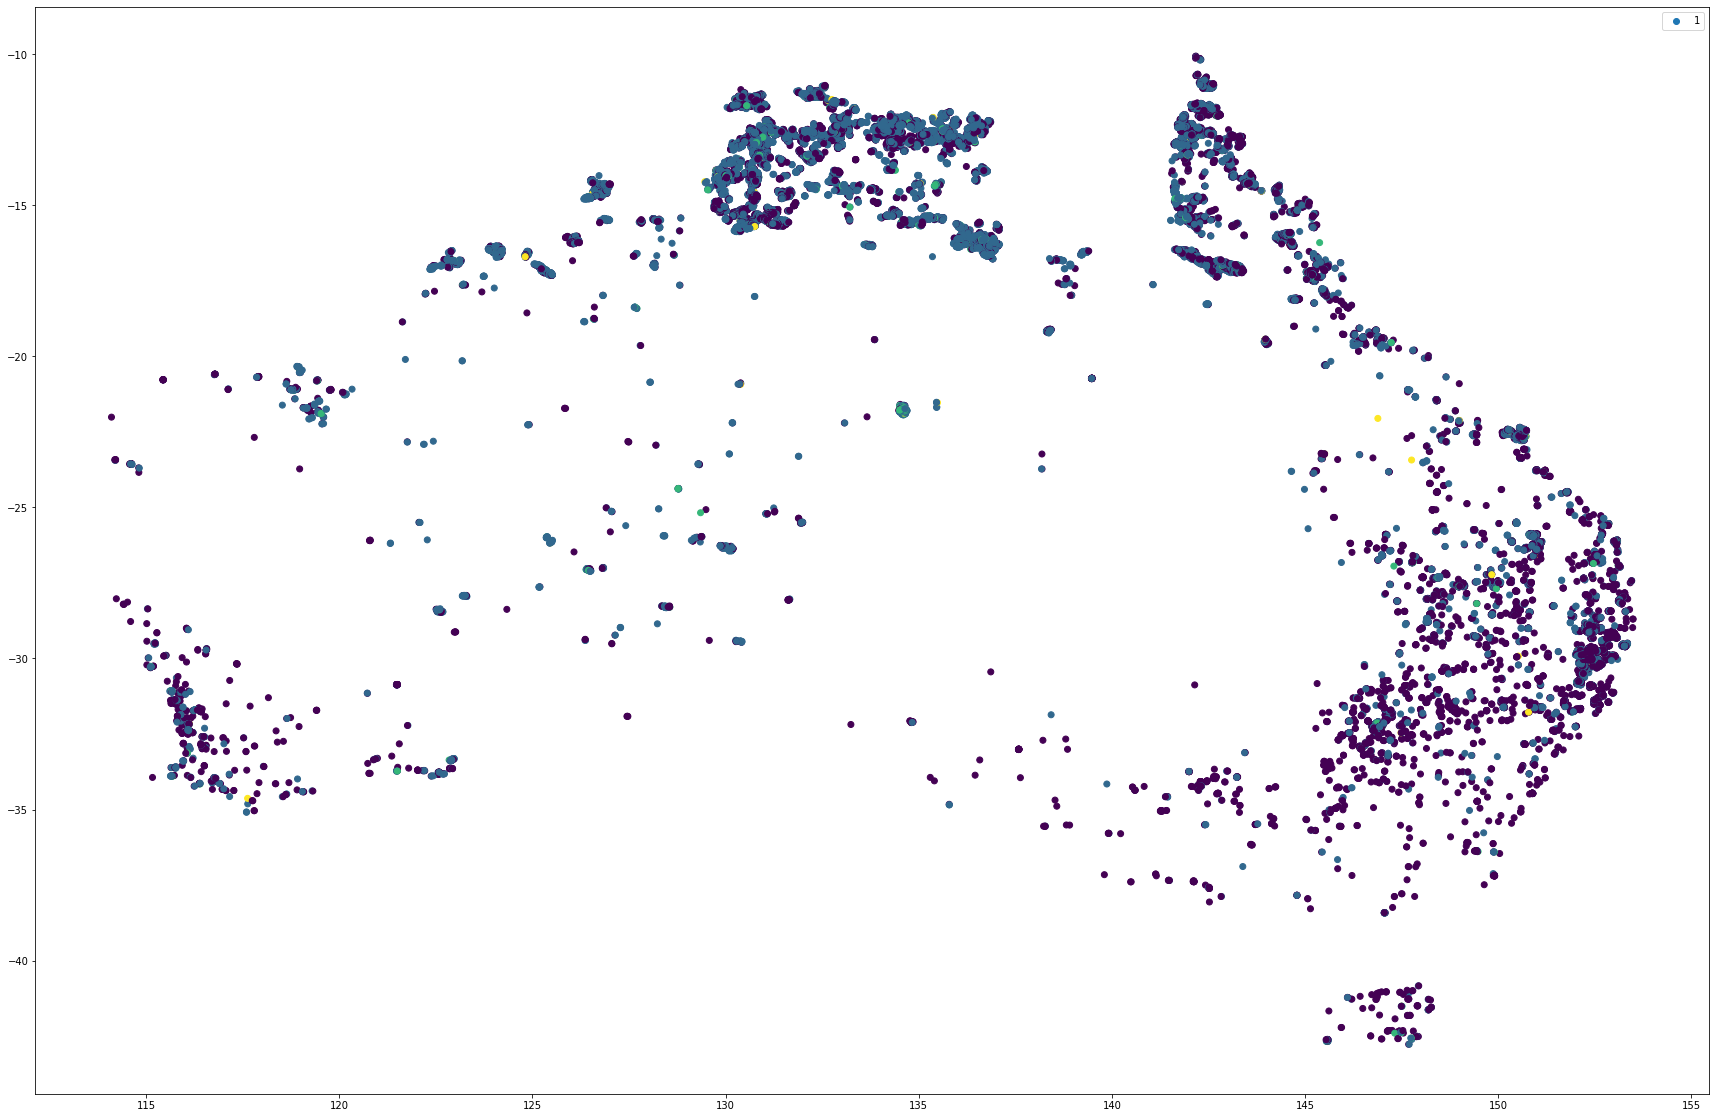

In [493]:
plt.figure(figsize=(30,20))
plt.scatter(df2['longitude'], df2['latitude'], c= risk2)
plt.legend(['1', '2', '3', '4'])

In [496]:
classes = {1:'low risk', 2:'mild risk',3:'high risk'}

long = input('what is longitude ')
lat = input('what is latitude ')
temp = input('what is the temperature ')

x_pred = pd.DataFrame()
x_pred['long'] = [long]
x_pred['lat'] = [lat]
x_pred['temp'] = [temp]


y_pred = knn.predict(x_pred)
print(classes[y_pred[0]])

what is longitude -11.54
what is latitude 151.342
what is the temperature430
high risk


In [497]:
import pickle

In [504]:
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))

In [505]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

print(classes[loaded_model.predict(x_pred)[0]])

high risk
